<a href="https://colab.research.google.com/github/uyan21/ISC/blob/master/deepLearning_stock1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#주가 정보 크롤링을 위해서 url 입력
code="195990"
url="https://finance.naver.com/item/sise_day.nhn?code="+code

import requests
from bs4 import BeautifulSoup
from openpyxl import Workbook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#엑셀에 따로쓰기 위함
wb=Workbook()
ws=wb.active

In [53]:
#1~129페이지 까지 긁는다
#액면 분할 이후 데이터 취급 주의
for i in range(1,130):
  tmplist=[]
  tmp=0
  source=requests.get(url+"&page="+str(i)).text

  soup=BeautifulSoup(source,"html.parser")
  html=soup.select("table.type2")
  for t in html:
    text=t.get_text().replace("\t","")
    while "\n\n" in text:
      text=text.replace("\n\n","\n")
  text=text[1:]
  textlist=text.split("\n")
  if i>1:
    textlist=textlist[7:]

  for t in textlist:
    tmplist.append(t)
    tmp+=1
    if tmp>6:
      ws.append(tmplist)
      tmplist=[]
      tmp=0
  wb.save("stock1.xlsx")
print("Done.")

Done.


In [54]:
#크롤링한 엑셀 데이터 다시 읽어와서 확인 한다.
df=pd.read_excel("stock1.xlsx")
print(df['종가'].head(5))

0    2,660
1    2,735
2    3,000
3    3,000
4    2,885
Name: 종가, dtype: object


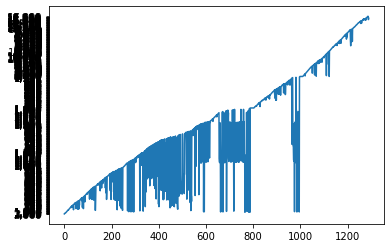

In [55]:
#종가 데이터 그래프 출력(정규화 필요함)
plt.plot(df['종가'])
plt.show()

In [58]:
#정규화를 위해 ,빼고 문자열 float으로 형변환
df=pd.read_excel("stock1.xlsx")
for i in range(1,7):
  df.iloc[:,i]=df.iloc[:,i].str.replace(pat=',', repl='', regex=False)
  df.iloc[:,i]=df.iloc[:,i].astype(float)

In [59]:
#확인
df.iloc[:,:]

,날짜,종가,전일비,시가,고가,저가,거래량
0,2020.11.27,2660.0,75.0,2530.0,2900.0,2355.0,244232291.0
1,2020.11.26,2735.0,265.0,3225.0,3400.0,2455.0,296816475.0
2,2020.11.25,3000.0,0.0,0.0,0.0,0.0,0.0
3,2020.11.24,3000.0,115.0,3030.0,3360.0,2720.0,297098469.0
4,2020.11.23,2885.0,370.0,2945.0,3265.0,2660.0,208996869.0
...,...,...,...,...,...,...,...
1285,2015.09.03,16900.0,100.0,17150.0,17650.0,16850.0,52292.0
1286,2015.09.02,17000.0,100.0,16450.0,17150.0,16400.0,46343.0
1287,2015.09.01,16900.0,100.0,17350.0,17600.0,16850.0,96195.0
1288,2015.08.31,16800.0,350.0,16400.0,16800.0,16250.0,31883.0


In [60]:
#날짜를 제외한 모든 데이터 정규화(nomalization)
for k in range(1,7):
  for i in range(len(df.iloc[:,1])):
    df.iloc[:,k][i]=(df.iloc[:,k][i]-min(df.iloc[:,k]))/(max(df.iloc[:,k])-min(df.iloc[:,k]))
print(df.iloc[:,0:])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


              날짜        종가       전일비        시가        고가        저가       거래량
0     2020.11.27  0.140732  0.034884  0.145821  0.164306  0.139763  0.575220
1     2020.11.26  0.159935  0.123256  0.185879  0.192635  0.145697  0.699067
2     2020.11.25  0.175432  0.000000  0.000000  0.000000  0.000000  0.000000
3     2020.11.24  0.175432  0.053488  0.174640  0.190368  0.161424  0.699731
4     2020.11.23  0.168707  0.172093  0.169741  0.184986  0.157864  0.492233
...          ...       ...       ...       ...       ...       ...       ...
1285  2015.09.03  0.994118  0.285714  0.988473  1.000000  1.000000  0.543604
1286  2015.09.02  1.000000  0.285714  0.948127  0.974432  0.973294  0.481761
1287  2015.09.01  1.000000  0.285714  1.000000  1.000000  1.000000  1.000000
1288  2015.08.31  1.000000  1.000000  1.000000  1.000000  1.000000  0.518195
1289  2015.08.28  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000

[1290 rows x 7 columns]


In [61]:
#전일비와 날짜는 쓸모없는 칼럼이므로 날린다
del df['전일비']
del df['날짜']
print(df)

            종가        시가        고가        저가       거래량
0     0.140732  0.145821  0.164306  0.139763  0.575220
1     0.159935  0.185879  0.192635  0.145697  0.699067
2     0.175432  0.000000  0.000000  0.000000  0.000000
3     0.175432  0.174640  0.190368  0.161424  0.699731
4     0.168707  0.169741  0.184986  0.157864  0.492233
...        ...       ...       ...       ...       ...
1285  0.994118  0.988473  1.000000  1.000000  0.543604
1286  1.000000  0.948127  0.974432  0.973294  0.481761
1287  1.000000  1.000000  1.000000  1.000000  1.000000
1288  1.000000  1.000000  1.000000  1.000000  0.518195
1289  1.000000  1.000000  1.000000  1.000000  1.000000

[1290 rows x 5 columns]


In [62]:
#텐서플로우, 케라스 넘파이 임포트
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import numpy as np

In [67]:
#데이터를 한칸씩 밀어서 다음날 종가를 추론 할수있게 한다
x_train=df[:999].drop(['종가'],axis='columns')
y_train=df[1:1000]['종가']
x_train=np.array(x_train).astype(np.float32)
y_train=np.array(y_train).astype(np.float32)
x_train=x_train.reshape(x_train.shape[0],4,1)
x_test=df[999:1289].drop(['종가'],axis='columns')
y_test=df[1000:]['종가']
x_test=np.array(x_test).astype(np.float32)
y_test=np.array(y_test).astype(np.float32)
x_test=x_test.reshape(x_test.shape[0],4,1)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_train[:5],y_train[:5])

(999, 4, 1) (999,)
(290, 4, 1) (290,)
[[[0.14582133]
  [0.16430596]
  [0.13976261]
  [0.5752197 ]]

 [[0.18587896]
  [0.19263457]
  [0.14569733]
  [0.6990668 ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.17463978]
  [0.19036826]
  [0.16142434]
  [0.699731  ]]

 [[0.16974063]
  [0.18498583]
  [0.1578635 ]
  [0.4922327 ]]] [0.15993461 0.17543182 0.17543182 0.16870661 0.147069  ]


In [68]:
#실제로 매칭이 되나 확인
print(x_train[0],y_train[0])

[[0.14582133]
 [0.16430596]
 [0.13976261]
 [0.5752197 ]] 0.15993461


In [69]:
#레이어 모델을 쌓는다.
model = Sequential()

model.add(LSTM(64,
    input_shape=(4,1),
    return_sequences=True))

model.add(LSTM(
    64,
    return_sequences=False))
model.add(Dense(1,Activation('linear')))

model.compile(loss='mse', optimizer='rmsprop',metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4, 64)             16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [70]:
#학습시작
model.fit(x_train,y_train,epochs=10,batch_size=4)

Epoch 1/10
250/250 [==============================] - 1s 5ms/step - loss: 7.1845e-04 - accuracy: 0.0000e+00
Epoch 2/10
250/250 [==============================] - 1s 5ms/step - loss: 6.2000e-04 - accuracy: 0.0000e+00
Epoch 3/10
250/250 [==============================] - 1s 5ms/step - loss: 5.9646e-04 - accuracy: 0.0000e+00
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 5.8063e-04 - accuracy: 0.0000e+00
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 5.6506e-04 - accuracy: 0.0000e+00
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 5.5057e-04 - accuracy: 0.0000e+00
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: 5.5657e-04 - accuracy: 0.0000e+00
Epoch 8/10
250/250 [==============================] - 1s 5ms/step - loss: 5.5140e-04 - accuracy: 0.0000e+00
Epoch 9/10
250/250 [==============================] - 1s 5ms/step - loss: 5.5784e-04 - accuracy: 0.0000e+00
Epoch 10/10
250/250 [=======

In [71]:
#추이를 확인한다 정확하진 않음
model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.2523 - accuracy: 0.0207


[0.25226524472236633, 0.02068965509533882]

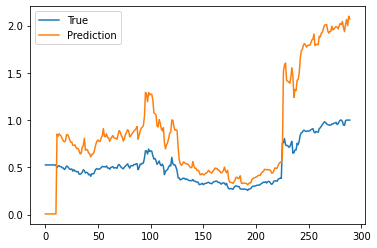

In [72]:
#뒤에 자른 데이터와 그래프로 비교한다
pred=model.predict(x_test)
fig=plt.figure(facecolor='white')
ax=fig.add_subplot(111)
ax.plot(y_test,label='True')
ax.plot(pred,label='Prediction')
ax.legend()
plt.show()

In [ ]:
print(x_train,y_train)

[[[0.14582133]
  [0.16430596]
  [0.13976261]
  [0.5752197 ]]

 [[0.18587896]
  [0.19263457]
  [0.14569733]
  [0.6990668 ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 ...

 [[0.09193084]
  [0.09348442]
  [0.09287834]
  [0.24780926]]

 [[0.0945245 ]
  [0.09830029]
  [0.08783383]
  [1.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]] [0.15993461 0.17543182 0.17543182 0.16870661 0.147069   0.147069
 0.1131506  0.08712846 0.07981987 0.07572668 0.08128248 0.06695493
 0.06315423 0.04870994 0.04759962 0.04713185 0.04759971 0.04771667
 0.04876931 0.0473658  0.04730732 0.04783363 0.04865235 0.04455877
 0.04619635 0.04572851 0.04678114 0.04607939 0.04502675 0.04496827
 0.04572851 0.04643026 0.04607939 0.04561155 0.04648874 0.04613787
 0.0466057  0.04672266 0.04771682 0.04602091 0.042863   0.04262918
 0.04473446 0.04385727 0.04537774 0.04631341 0.04602101 0.04672277
 0.04707365 0.04783388 0.04607949 0.04602101 0.04637189 0.04742453
 0.04800932 0.0478338